In [1]:
import numpy as np 
import sunpy 
import sunpy.map
import matplotlib.pyplot as plt
from glob import glob # file_search() in IDL 
from IPython.display import HTML, display # to visualize the anim
import matplotlib.animation as animation

In [2]:
aia_files = sorted(glob("../data/sdo_seq/*.fits"))

In [3]:
print(aia_files)

['../data/sdo_seq/aia.lev1_euv_12s.2022-10-24T193003Z.171.image.fits', '../data/sdo_seq/aia.lev1_euv_12s.2022-10-24T193015Z.171.image.fits', '../data/sdo_seq/aia.lev1_euv_12s.2022-10-24T193027Z.171.image.fits', '../data/sdo_seq/aia.lev1_euv_12s.2022-10-24T193039Z.171.image.fits', '../data/sdo_seq/aia.lev1_euv_12s.2022-10-24T193051Z.171.image.fits']


In [4]:
# load them into a sunpy.map.Mapsequence()

aia_seq = sunpy.map.Map(aia_files, sequence=True)

In [5]:
type(aia_seq)

sunpy.map.mapsequence.MapSequence

In [6]:
aia_maps = sunpy.map.Map(aia_files, sequence=False)

In [7]:
# this is not a sequence, it is a list of maps
type(aia_maps)

list

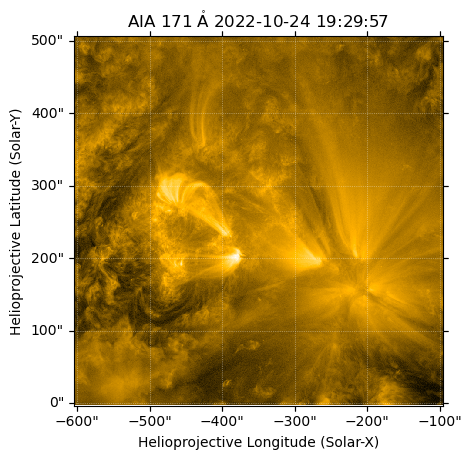

In [8]:
# I want to plot the first map
aia_maps[0].plot()

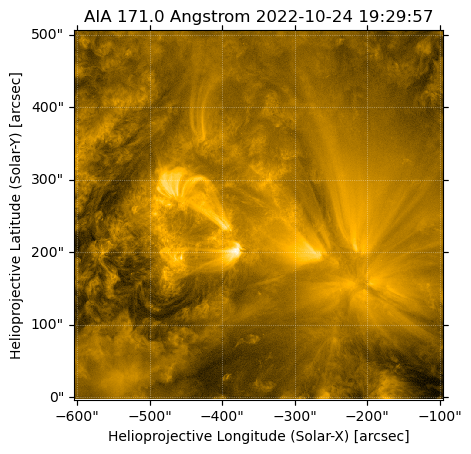

In [9]:
anim = aia_seq[:3].plot()

In [10]:
display(HTML(anim.to_jshtml()))

In [11]:
anim.save("../data/movie/aia_movie.mp4")

In [12]:
# memmap, only works for map, not mapsequence 

aia_seq_memmap = sunpy.map.Map(aia_files, memmap=True,
                              sequence=False)

# memmap wont use the FTIS keyword BSCALE, e.g., IRIS

In [13]:
# make movie from 3d array

In [14]:
# get the 3d array from the sequence 

aia_array = aia_seq.data

In [15]:
type(aia_array)

numpy.ndarray

In [16]:
aia_array.shape # (ny, nx, nt)

(850, 850, 5)

In [17]:
def make_aia_movie(aia_array):
    # make the first frame 

    fig, ax = plt.subplots()
    im = ax.imshow(
            aia_array[:,:,0], # the first image
            origin="lower", # origin lower left 
            # some other plotting things we will go back later 
    )

    # a function that will be used later to update frames
    def update_fig(index, im, aia_array):  # index must be the first 
        im.set_data(aia_array[:,:,index])   # set n-th frame data to the image

    # FunAnimation will create the movie using the first frame (fig) and 
    # how we update (update_fig)
    anim = animation.FuncAnimation(
        fig, update_fig, 
        frames = aia_array.shape[-1], # frames=nt
        fargs=(im, aia_array), # additional parameters passed to the update_fig() function
        blit=False # 
        )

    return anim 
        

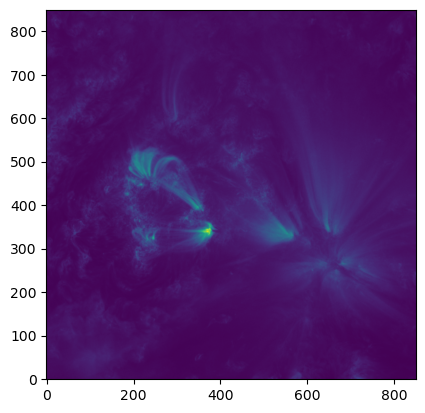

In [18]:
anim = make_aia_movie(aia_array)

In [19]:
display(HTML(anim.to_jshtml()))

In [20]:
# you can also save it as a .mp4 file

anim.save("../data/movie/poor_aia_movie.mp4")